# Prepare Data

Plan - Acquire - **Prepare** - Explore - Model - Deliver

## What we are doing and why:

**What:** Clean and tidy our data so that it is ready for exploration, analysis and modeling

**Why:** Set ourselves up for certainty! 

    1) Ensure that our observations will be sound:
        Validity of statistical and human observations
    2) Ensure that we will not have computational errors:
        non numerical data cells, nulls/NaNs
    3) Protect against overfitting:
        Ensure that have a split data structure prior to drawing conclusions
    4) survived is our trget variable so its not featured in model

## High level Roadmap:

**Input:** An aquired dataset (One Pandas Dataframe) 

**Output:** Cleaned data split into Train, Validate, and Test sets (Three Pandas Dataframes)

**Processes:** Inspect and summarize the data ---> Clean the data ---> Split the data

## Inspect and Summarize

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# train test split from sklearn
from sklearn.model_selection import train_test_split
# imputer from sklearn
from sklearn.impute import SimpleImputer

# filter out warnings
import warnings
warnings.filterwarnings('ignore')

# our own acquire script:
import acquire

## Inspect and Summarize

In [2]:
# importing data
df = acquire.get_titanic_data()
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


#### Gather our takeaways, i.e., what we are going to do when we clean:

In [4]:
# check if they are the same
pd.crosstab (df["class"], df["pclass"])

pclass,1,2,3
class,,,
First,216,0,0
Second,0,184,0
Third,0,0,491


In [5]:
pd.crosstab(df.embarked, df.embark_town)

embark_town,Cherbourg,Queenstown,Southampton
embarked,,,
C,168,0,0
Q,0,77,0
S,0,0,644


# takeaways 
# survive is our target variable (it will be a feature of the target)
# maybe remove passager id

In [6]:
df.describe()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [7]:
df.columns = df.columns.str.replace(" ", "_")


In [8]:
catcols = [col for col in df.columns if df[col].dtype == 'object']

In [9]:
numcols = [col for col in df.columns if df[col].dtype == 'int']
numcols


['passenger_id', 'survived', 'pclass', 'sibsp', 'parch', 'alone']

In [10]:
for col in catcols:
    
    print(f"column: {col}")
    print(df[col].value_counts())
    print("--------")
    print(df[col].value_counts(normalize = True, dropna = False))
    print("===========")

column: sex
male      577
female    314
Name: sex, dtype: int64
--------
male      0.647587
female    0.352413
Name: sex, dtype: float64
column: embarked
S    644
C    168
Q     77
Name: embarked, dtype: int64
--------
S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: embarked, dtype: float64
column: class
Third     491
First     216
Second    184
Name: class, dtype: int64
--------
Third     0.551066
First     0.242424
Second    0.206510
Name: class, dtype: float64
column: deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
--------
NaN    0.772166
C      0.066218
B      0.052750
D      0.037037
E      0.035915
A      0.016835
F      0.014590
G      0.004489
Name: deck, dtype: float64
column: embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
--------
Southampton    0.722783
Cherbourg      0.188552
Queenstown     0.086420
NaN            0.002245
Name: embark_town, dtype: float64


## takeaways
    remove embarked
    remove class
    remove passanger id
    remove deck
        too many nulls(time consuming to build a model for nulls)
    lots of missing data n age
        impute nulls
    two nulls in embark town
    
    


## Clean

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.shape

(891, 13)

In [13]:
columns_to_drop = ['embarked','class','passenger_id','deck']

In [14]:
data = df.drop(columns = columns_to_drop)
# dont over write the original 
data

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Southampton,1
887,1,1,female,19.0,0,0,30.0000,Southampton,1
888,0,3,female,NaN,1,2,23.4500,Southampton,0
889,1,1,male,26.0,0,0,30.0000,Cherbourg,1


#### Encoding: Turning Categorical Values into Boolean Values (0,1)
 - We have two options: simple encoding or one-hot encoding

In [15]:
## STEPS
### make dataframe from dummy columns
### concactenante our dummy DF to our original DF
dummy_df = pd.get_dummies(df[['sex', 'embark_town']], dummy_na =False, drop_first = [True,True])
dummy_df

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1
...,...,...,...
886,1,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [16]:
data = pd.concat([data, dummy_df], axis = 1)
data
#  

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,22.0,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Southampton,1,1,0,1
887,1,1,female,19.0,0,0,30.0000,Southampton,1,0,0,1
888,0,3,female,NaN,1,2,23.4500,Southampton,0,0,0,1
889,1,1,male,26.0,0,0,30.0000,Cherbourg,1,1,0,0


## Putting our Work Into a Function

In [17]:
def clean_titanic_data(df):
    '''Takes in a Titanic DF and returns a clean DF 
       arguments - a pandas df with the expected feature names and columns 
       Return:clea_df a df with cleaning operation perfomed on it '''
    df.drop_duplicates(inplace = True)
    df = df.drop(columns = columns_to_drop)
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], dummy_na =False, drop_first = [True,True])
    df = pd.concat([df, dummy_df], axis = 1)
    return df.drop(columns=["sex", "embark_town"])
    
    

## Train, Validate, Test Split

In [18]:
df = acquire.get_titanic_data()
clean_df = clean_titanic_data(df)
clean_df

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,1,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,1
888,0,3,NaN,1,2,23.4500,0,0,0,1
889,1,1,26.0,0,0,30.0000,1,1,0,0


In [19]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   age                      714 non-null    float64
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   fare                     891 non-null    float64
 6   alone                    891 non-null    int64  
 7   sex_male                 891 non-null    uint8  
 8   embark_town_Queenstown   891 non-null    uint8  
 9   embark_town_Southampton  891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.3 KB


In [20]:
# only get mean of training set
train, test = train_test_split(clean_df,
                               train_size = 0.8,
                               stratify = clean_df.survived,
                               random_state = 1234)

In [21]:
train.shape

(712, 10)

In [22]:
test.shape

(179, 10)

In [23]:
train, validate = train_test_split(train,
                                  train_size = 0.7,
                                  stratify = train.survived,
                                  random_state = 1234)

In [24]:
train.shape

(498, 10)

In [25]:
validate.shape

(214, 10)

In [26]:
test.shape

(179, 10)

In [27]:
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
301,1,3,NaN,2,0,23.2500,0,1,1,0
290,1,1,26.0,0,0,78.8500,1,0,0,1
779,1,1,43.0,0,1,211.3375,0,0,0,1
356,1,1,22.0,0,1,55.0000,0,0,0,1
147,0,3,9.0,2,2,34.3750,0,0,0,1


In [28]:
validate.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
91,0,3,20.0,0,0,7.8542,1,1,0,1
297,0,1,2.0,1,2,151.5500,0,0,0,1
101,0,3,NaN,0,0,7.8958,1,1,0,1
705,0,2,39.0,0,0,26.0000,1,1,0,1
335,0,3,NaN,0,0,7.8958,1,1,0,1


In [29]:
test.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
92,0,1,46.0,1,0,61.1750,0,1,0,1
552,0,3,NaN,0,0,7.8292,1,1,1,0
810,0,3,26.0,0,0,7.8875,1,1,0,1
29,0,3,NaN,0,0,7.8958,1,1,0,1
681,1,1,27.0,0,0,76.7292,1,1,0,0


## Option for Missing Values: Impute

We can impute values using the mean, median, mode (most frequent), or a constant value. We will use sklearn.imputer.SimpleImputer to do this.  

1. Create the imputer object, selecting the strategy used to impute (mean, median or mode (strategy = 'most_frequent'). 
2. Fit to train. This means compute the mean, median, or most_frequent (i.e. mode) for each of the columns that will be imputed. Store that value in the imputer object. 
3. Transform train: fill missing values in train dataset with that value identified
4. Transform test: fill missing values with that value identified

1. Create the `SimpleImputer` object, which we will store in the variable `imputer`. In the creation of the object, we will specify the strategy to use (`mean`, `median`, `most_frequent`). Essentially, this is creating the instructions and assigning them to a variable we will reference.  

In [30]:
imputer = SimpleImputer(strategy = "mean", missing_values = np.nan)

2. `Fit` the imputer to the columns in the training df.  This means that the imputer will determine the `most_frequent` value, or other value depending on the `strategy` called, for each column.   

In [31]:
imputer = imputer.fit(train[["age"]])

3. It will store that value in the imputer object to use upon calling `transform.` We will call `transform` on each of our samples to fill any missing values.  

In [32]:
train[["age"]] = imputer.transform(train[["age"]])

In [33]:
validate[["age"]] = imputer.transform(validate[["age"]])

In [34]:
test[["age"]] = imputer.transform(test[["age"]])

Create a function that will run through all of these steps, when I provide a train and test dataframe, a strategy, and a list of columns. 

In [35]:
def impute_age (train, validate, test):
    '''imputes the mean age of train to all data sets'''
    imputer = SimpleImputer(strategy = "mean", missing_values = np.nan)
    imputer = imputer.fit(train[["age"]])
    train[["age"]] = imputer.transform(train[["age"]])
    validate[["age"]] = imputer.transform(validate[["age"]])
    test[["age"]] = imputer.transform(test[["age"]])
    return train, validate,test

Blend the clean, split and impute functions into a single prep_data() function. 

In [36]:
def prep_titanic_data(df):
    df= clean_titanic_data(df)
    train, test =train_test_split(df,
                                 train_size = 0.8,
                                 stratify = df.survived,
                                 random_state = 1234)
    train, validate = train_test_split(train,
                                      train_size = 0.7,
                                      stratify = train.survived,
                                      random_state = 1234)
    train, validate, test = impute_age(train, validate, test)
    return train, validate, test

In [37]:
df = acquire.get_titanic_data()
train, validate, test = prep_titanic_data(df)
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
301,1,3,30.189296,2,0,23.2500,0,1,1,0
290,1,1,26.000000,0,0,78.8500,1,0,0,1
779,1,1,43.000000,0,1,211.3375,0,0,0,1
356,1,1,22.000000,0,1,55.0000,0,0,0,1
147,0,3,9.000000,2,2,34.3750,0,0,0,1


<AxesSubplot:>

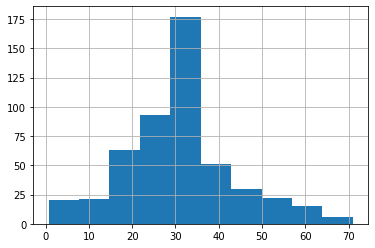

In [38]:
train.age.hist()

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 301 to 3
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 498 non-null    int64  
 1   pclass                   498 non-null    int64  
 2   age                      498 non-null    float64
 3   sibsp                    498 non-null    int64  
 4   parch                    498 non-null    int64  
 5   fare                     498 non-null    float64
 6   alone                    498 non-null    int64  
 7   sex_male                 498 non-null    uint8  
 8   embark_town_Queenstown   498 non-null    uint8  
 9   embark_town_Southampton  498 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 32.6 KB


## Exercises

The end product of this exercise should be the specified functions in a python script named `prepare.py`.
Do these in your `classification_exercises.ipynb` first, then transfer to the prepare.py file. 

This work should all be saved in your local `classification-exercises` repo. Then add, commit, and push your changes.

Using the Iris Data:  

1. Use the function defined in `acquire.py` to load the iris data.  

1. Drop the `species_id` and `measurement_id` columns.  

1. Rename the `species_name` column to just `species`.  

1. Create dummy variables of the species name. 

1. Create a function named `prep_iris` that accepts the untransformed iris data, and returns the data with the transformations above applied.  

In [40]:
df_iris = acquire.get_iris_data()
df_iris.sample(5)

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
113,3,virginica,5.7,2.5,5.0,2.0
21,1,setosa,5.1,3.7,1.5,0.4
118,3,virginica,7.7,2.6,6.9,2.3
116,3,virginica,6.5,3.0,5.5,1.8
61,2,versicolor,5.9,3.0,4.2,1.5


In [41]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species_id    150 non-null    int64  
 1   species_name  150 non-null    object 
 2   sepal_length  150 non-null    float64
 3   sepal_width   150 non-null    float64
 4   petal_length  150 non-null    float64
 5   petal_width   150 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


1. Drop the `species_id` and `measurement_id` columns.  


In [42]:
columns_to_drop = ["species_id"]
df_iris = df_iris.drop(columns = columns_to_drop)
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species_name  150 non-null    object 
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


1. Rename the `species_name` column to just `species`.  


In [43]:
df_iris = df_iris.rename(columns = {"species_name": "species"})
df_iris.sample(20)

,species,sepal_length,sepal_width,petal_length,petal_width
139,virginica,6.9,3.1,5.4,2.1
81,versicolor,5.5,2.4,3.7,1.0
29,setosa,4.7,3.2,1.6,0.2
125,virginica,7.2,3.2,6.0,1.8
55,versicolor,5.7,2.8,4.5,1.3
102,virginica,7.1,3.0,5.9,2.1
111,virginica,6.4,2.7,5.3,1.9
108,virginica,6.7,2.5,5.8,1.8
91,versicolor,6.1,3.0,4.6,1.4
44,setosa,5.1,3.8,1.9,0.4


1. Create dummy variables of the species name. 


In [44]:
df_iris_dummies = pd.get_dummies(df_iris[["species"]])
df_iris_dummies
# 2 out of the thee columns for species are showing therefore if both are 0 then the last is 1

,species_setosa,species_versicolor,species_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [45]:
df_iris = df_iris.drop(columns ="species")


In [46]:
df_iris = pd.concat([df_iris_dummies,df_iris ], axis =1)
df_iris

,species_setosa,species_versicolor,species_virginica,sepal_length,sepal_width,petal_length,petal_width
0,1,0,0,5.1,3.5,1.4,0.2
1,1,0,0,4.9,3.0,1.4,0.2
2,1,0,0,4.7,3.2,1.3,0.2
3,1,0,0,4.6,3.1,1.5,0.2
4,1,0,0,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...,...
145,0,0,1,6.7,3.0,5.2,2.3
146,0,0,1,6.3,2.5,5.0,1.9
147,0,0,1,6.5,3.0,5.2,2.0
148,0,0,1,6.2,3.4,5.4,2.3


In [47]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   species_setosa      150 non-null    uint8  
 1   species_versicolor  150 non-null    uint8  
 2   species_virginica   150 non-null    uint8  
 3   sepal_length        150 non-null    float64
 4   sepal_width         150 non-null    float64
 5   petal_length        150 non-null    float64
 6   petal_width         150 non-null    float64
dtypes: float64(4), uint8(3)
memory usage: 6.3 KB


1. Create a function named `prep_iris` that accepts the untransformed iris data, and returns the data with the transformations above applied.  

In [48]:
def prep_iris(df_iris):
    columns_to_drop = ["species_id"]
    df_iris = df_iris.drop(columns = columns_to_drop)
    df_iris = df_iris.rename(columns = {"species_name": "species"})
    df_iris_new_dummies = pd.get_dummies(df_iris[["species"]])
    df_iris = df_iris.drop(columns  =  "species")
    df_iris = pd.concat([df_iris_new_dummies,df_iris], axis =1)
    return df_iris

    

In [ ]:
iris_df = acquire.get_iris_data()
iris_df = prep_iris(iris_df)
iris_df.head()
# it works

# Telco Data clean up

In [50]:
data = acquire.new_telco_data()
data.head()


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [51]:
print(data["customer_id"].nunique())
# checking if the customer id's are all unique 

7043


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

## Findings
 - drop (sinc there are other columns representing the same thing)
     payment_type_id             
     internet_service_type_id  
     contract_type_id           
     customer_id  
     phone service(because that and multiple lines represent the same thing )
 - convert total charges to float
 - payment_type_id, internet_service_type_id, contract_type_id can be dropped in favor of phone service, contract type and internet service being converted into dummies
 - convert 
    gender
    dependents
    partners
    senior citizen
    churn
    contract_type 
    internet_service_type     
    payment_type  
    phone_service             7043 non-null   object 
    multiple_lines            7043 non-null   object 
    online_security           7043 non-null   object 
    online_backup             7043 non-null   object 
    device_protection         7043 non-null   object 
    tech_support              7043 non-null   object 
    streaming_tv              7043 non-null   object 
    streaming_movies          7043 non-null   object 
    paperless_billing         7043 non-null   object 

In [53]:
columns_to_drop= ['payment_type_id', 'internet_service_type_id','contract_type_id','customer_id','phone_service']
data = data.drop(columns = columns_to_drop)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   int64  
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   multiple_lines         7043 non-null   object 
 6   online_security        7043 non-null   object 
 7   online_backup          7043 non-null   object 
 8   device_protection      7043 non-null   object 
 9   tech_support           7043 non-null   object 
 10  streaming_tv           7043 non-null   object 
 11  streaming_movies       7043 non-null   object 
 12  paperless_billing      7043 non-null   object 
 13  monthly_charges        7043 non-null   float64
 14  total_charges          7043 non-null   object 
 15  chur

In [54]:
df = acquire.get_titanic_data()


In [55]:
catcols = [col for col in data.columns if data[col].dtype == 'object']

In [56]:
for col in catcols:
    
    print(f"column: {col}")
    print(data[col].value_counts())
    print("--------")
    print(data[col].value_counts(normalize = True, dropna = False))
    print("===========")

column: gender
Male      3555
Female    3488
Name: gender, dtype: int64
--------
Male      0.504756
Female    0.495244
Name: gender, dtype: float64
column: partner
No     3641
Yes    3402
Name: partner, dtype: int64
--------
No     0.516967
Yes    0.483033
Name: partner, dtype: float64
column: dependents
No     4933
Yes    2110
Name: dependents, dtype: int64
--------
No     0.700412
Yes    0.299588
Name: dependents, dtype: float64
column: multiple_lines
No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64
--------
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: multiple_lines, dtype: float64
column: online_security
No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64
--------
No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: online_security, dtype: float64
column: onli

In [57]:
catcols = [col for col in data.columns if data[col].dtype == 'object']

In [58]:
data['payment_type'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [59]:
data['total_charges'] = data['total_charges'].str.strip()
data = data[data.total_charges !=""]
data['total_charges']= pd.to_numeric(data['total_charges'], downcast='float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7032 non-null   object 
 1   senior_citizen         7032 non-null   int64  
 2   partner                7032 non-null   object 
 3   dependents             7032 non-null   object 
 4   tenure                 7032 non-null   int64  
 5   multiple_lines         7032 non-null   object 
 6   online_security        7032 non-null   object 
 7   online_backup          7032 non-null   object 
 8   device_protection      7032 non-null   object 
 9   tech_support           7032 non-null   object 
 10  streaming_tv           7032 non-null   object 
 11  streaming_movies       7032 non-null   object 
 12  paperless_billing      7032 non-null   object 
 13  monthly_charges        7032 non-null   float64
 14  total_charges          7032 non-null   float32
 15  chur

In [60]:
telco_dummy_df = pd.get_dummies(data[['gender', 'partner','dependents','multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','contract_type','internet_service_type','payment_type']], dummy_na =False, drop_first = True)
telco_dummy_df

,gender_Male,partner_Yes,dependents_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,1,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,1,0
3,1,1,0,0,0,0,0,0,1,0,...,1,1,1,0,0,1,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7039,1,1,0,0,1,0,0,0,0,0,...,1,1,1,0,0,1,0,0,1,0
7040,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7041,1,1,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [61]:
data = pd.concat([data, telco_dummy_df], axis =1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   object 
 1   senior_citizen                         7032 non-null   int64  
 2   partner                                7032 non-null   object 
 3   dependents                             7032 non-null   object 
 4   tenure                                 7032 non-null   int64  
 5   multiple_lines                         7032 non-null   object 
 6   online_security                        7032 non-null   object 
 7   online_backup                          7032 non-null   object 
 8   device_protection                      7032 non-null   object 
 9   tech_support                           7032 non-null   object 
 10  streaming_tv                           7032 non-null   object 
 11  stre

## if time allows it, one can create a dataframe with all code and numbers, however for visialization purpoes, keep the data as was and not drop the uncoded version

In [62]:
columns_dropped = ['gender', 'partner','dependents','multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','contract_type','internet_service_type','payment_type']
data = data.drop(columns = columns_dropped)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   monthly_charges                        7032 non-null   float64
 3   total_charges                          7032 non-null   float32
 4   gender_Male                            7032 non-null   uint8  
 5   partner_Yes                            7032 non-null   uint8  
 6   dependents_Yes                         7032 non-null   uint8  
 7   multiple_lines_No phone service        7032 non-null   uint8  
 8   multiple_lines_Yes                     7032 non-null   uint8  
 9   online_security_No internet service    7032 non-null   uint8  
 10  online_security_Yes                    7032 non-null   uint8  
 11  onli

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   senior_citizen                         7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   monthly_charges                        7032 non-null   float64
 3   total_charges                          7032 non-null   float32
 4   gender_Male                            7032 non-null   uint8  
 5   partner_Yes                            7032 non-null   uint8  
 6   dependents_Yes                         7032 non-null   uint8  
 7   multiple_lines_No phone service        7032 non-null   uint8  
 8   multiple_lines_Yes                     7032 non-null   uint8  
 9   online_security_No internet service    7032 non-null   uint8  
 10  online_security_Yes                    7032 non-null   uint8  
 11  onli

In [64]:
def prep_telco_data(df):
    '''Takes in a telco DF and returns a clean DF 
       arguments - a pandas df with the expected feature names and columns 
       Return:clea_df a df with cleaning operation perfomed on it '''
    columns_to_drop= ['payment_type_id', 'internet_service_type_id','contract_type_id','customer_id','phone_service']
    df = df.drop(columns = columns_to_drop)
    # convert charges to a float
    df['total_charges'] = df['total_charges'].str.strip()
    df = df[df.total_charges !=""]
    df['total_charges']= pd.to_numeric(df['total_charges'], downcast='float')
    telco_dummy_df = pd.get_dummies(df[['gender', 'partner','dependents','multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','contract_type','internet_service_type','payment_type']], dummy_na =False, drop_first = True)
    df = pd.concat([df, telco_dummy_df], axis =1)
    columns_dropped = ['gender', 'partner','dependents','multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','contract_type','internet_service_type','payment_type']
    df = df.drop(columns = columns_dropped)
    return df



In [ ]:
df.info()

In [ ]:
# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 

train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.churn_Yes)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.churn_Yes)


train -> (3937, 30)
validate -> (1688, 30)
test -> (1407, 30)
